Везьменова Ксения
4 вариант

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

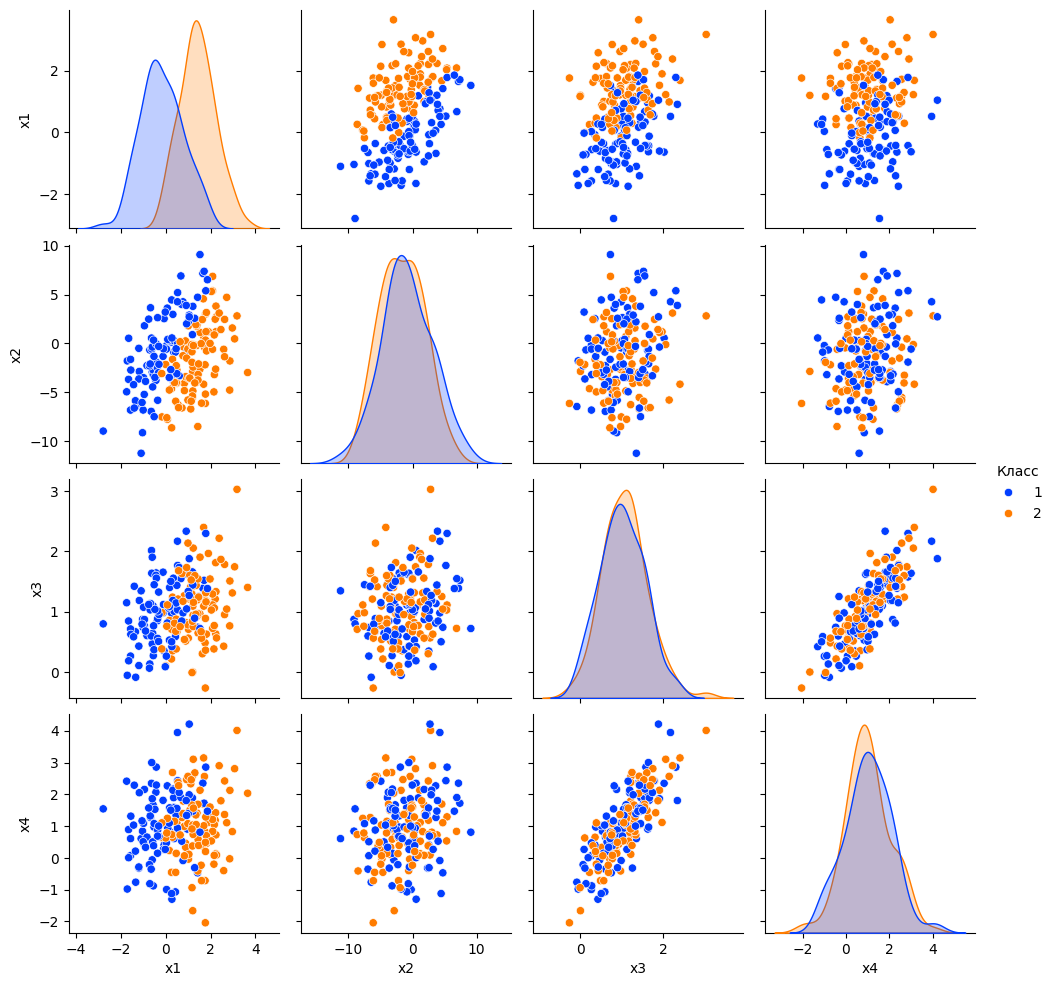

In [2]:
#1 - Выбрать данные в соответствии с вариантом и построить двумерные диаграммы рассеяния с раскраской по классам.

data = pd.read_excel('Лабораторная работа 7.xlsx', sheet_name = 4, names = ['Класс', 'x1', 'x2', 'x3','x4'])
data.dropna()
sns.pairplot(data, hue = 'Класс', palette = 'bright')
plt.show()

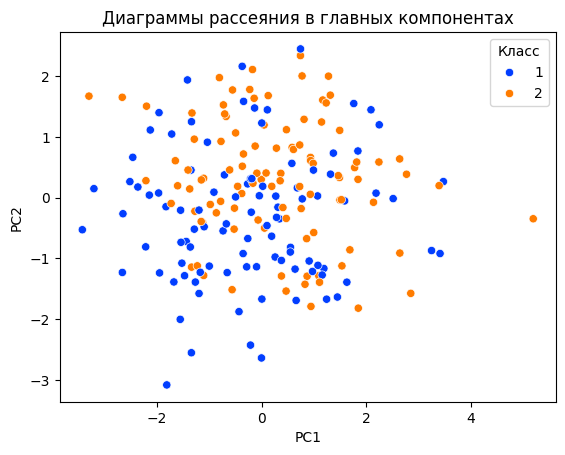

In [3]:
#2 - Построить диаграммы рассеяния в координатах главных компонент с раскраской по классам.

Y = data['Класс']
X = data.drop('Класс', axis = 1)
sc = StandardScaler()
sc.fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index = X.index, columns = X.columns)
skpcamod = PCA().fit(X = Xsc)
scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:, :2])
scores_skl.columns = ['PC1', 'PC2']
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_skl, hue = Y, palette = 'bright')
plt.title('Диаграммы рассеяния в главных компонентах')
plt.show()

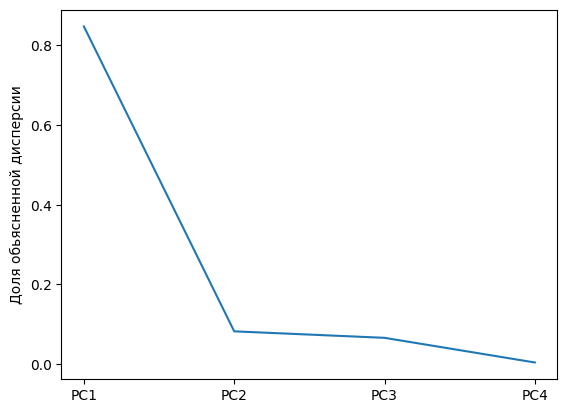

In [4]:
#3 - Построить график зависимости доли объясненной дисперсии от номера главной компоненты

pca = PCA(n_components=4)
pca.fit(X)
exp_variance1 = pca.explained_variance_ratio_
sns.lineplot(y = exp_variance1, x = range(4))
plt.ylabel('Доля обьясненной дисперсии')
plt.xticks(range(4), [f'PC{i+1}' for i in range(4)])
plt.show()